# Vision industrielle - TP initiatiation au traitement d'image avec Python

L'objectif de ce TP est de découvrir et d'utiliser des outils de traitement d'images. Le langage de programmation Python sera utilisé, ainsi que les librairies scientifiques suivantes:

    - scikit-image
    - NumPy
    - SciPy
    - matplotlib
    
Ces différentes font partie de la *stack* scientifique disponnible pour python. D'autres librairies tels que OpenCV, scikit-learn, pandas vous seront présentés aux cours des TPs suivants.

## A la fin de ce TP vous devriez être capable

	- d'ouvrir une image à partir d'un fichier
	- d'extraire les contours d'une image en niveau de gris
	- d'effectuer des opérations de filtrage linéaire
	- d'effectuer des opérations morphologique
	- de détecter la position d'un objet coloré



## Aide 
pour obtenir de l'aide sur une fonction : 
   
    - taper ?nom_fonction 
    - help(nom_fonction)
    
Voici une liste de ressources en ligne qui pourront vous être utile au cours du TP:

 - IPython notebook introduction: http://opentechschool.github.io/python-data-intro/core/notebook.html
 - Numpy quickstart: https://docs.scipy.org/doc/numpy-dev/user/quickstart.html
 - Numpy pour le traitement d'image http://scikit-image.org/docs/dev/user_guide/numpy_images.html

 

### exécuter la cellule suivante afin de charger l'ensemble des outils nécessaires

In [14]:
from functools import partial
import numpy as np
import scipy.ndimage
import imageio
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib notebook

import pip
pip.main('install imageio'.split())
import imageio
import skimage.morphology


def format_coord(x, y, image):
    x = int(x + 0.5)
    y = int(y + 0.5)
    try:
        val = str(image[y, x])
    except IndexError:
        val = "?"
    return "color={} @ [{}, {}]".format(val, y, x)

def display_image_nb(image, title='', cmap=None):
    fig, ax = plt.subplots(1,1)
    if cmap:
        ax.matshow(image, cmap=cmap)
    ax.matshow(image)
    ax.set_xlabel(title)
    ax.format_coord = partial(format_coord, image=image)
    return fig, ax

def display_image_color(image, title=''):
    fig, ax = plt.subplots(1,1)
    ax.imshow(image)
    ax.set_xlabel(title)
    ax.format_coord = partial(format_coord, image=image)
    return fig, ax

def draw_rectangle(y1, x1, y2, x2, color='red', ax=None):
    """ Add a rectangle on an image """
    if ax is None:
        ax = pyplot.gca()
    rect = mpatches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                              fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

print("OK let's go")

You are using pip version 7.1.2, however version 8.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


OK let's go


## 1. Introduction au tableau numpy pour le traitement d'image

Les images peuvent être représentées sour forme de tableaux multi-dimensionels. Comme nous sommes en Python, nous utilisons la librairie NumPy (NumPy is the fundamental package for scientific computing with Python: http://www.numpy.org).

Une image en niveau de gris correspond à un tableau à deux dimension, le code suivant permet de créer une image de façon manuelle.

In [53]:
image_niveau_de_gris = np.array([[8, 9, 10, 11], [5, 3, 2, 1], [8, 9, 0, 0]])
print(image_niveau_de_gris)

[[ 8  9 10 11]
 [ 5  3  2  1]
 [ 8  9  0  0]]


<IPython.core.display.Javascript object>


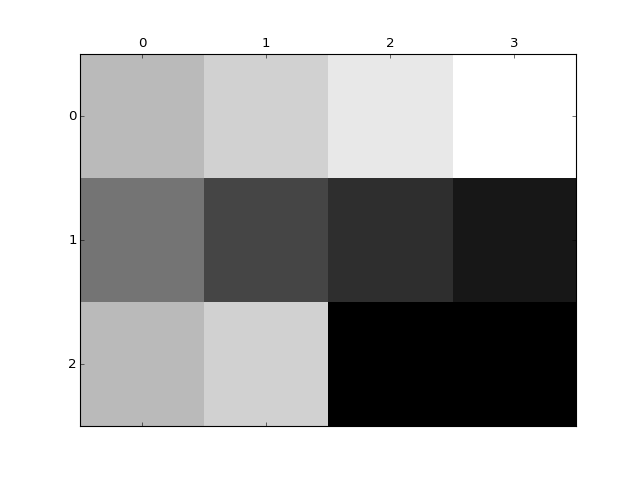

(<matplotlib.figure.Figure at 0x7f662fd41a90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f66376284e0>)

In [54]:
display_image_nb(image_niveau_de_gris)


<span style="color:red">Questions</span>

Quelle est valeur associée au pixel [0, 2]  (i.e ligne 0, colonne 2)




Vous pouvez accéder aux valeurs contenu dans l'image en utilisant la syntaxe suivante :

  image[ligne, colonne]

Compléter le code suivant pour acéder à la valeur associée au pixel de la ligne 0, et de la colonne 2

In [56]:
image_niveau_de_gris[]

SyntaxError: invalid syntax (<ipython-input-56-ccd71dfa6776>, line 1)

Pour représenter une image avec plusieurs cannaux (par exemple une image RGB), on utilise une nouvelle dimension.

<IPython.core.display.Javascript object>


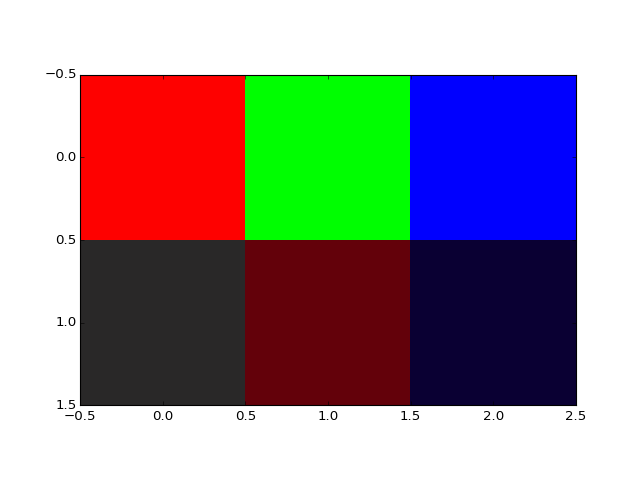

(<matplotlib.figure.Figure at 0x7f662ecfb438>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f662ecefda0>)

In [62]:
image_rgb = [[[255, 0, 0], [0, 255, 0], [0, 0, 255]], [[40, 40, 40], [100, 0, 10], [10, 0, 50]]]
image_rgb = np.array(image_rgb, dtype=np.uint8)
display_image_color(image_rgb)

Pour sélectionner un canal vous pouvez utiliser la syntaxe suivante: 
    
    image[:, :, 0] qui selectionnera seulement le canal 0 (i.e Red pour une image RGB)
    image[:, :, 1] qui selectionnera le canal 1, etc..
    
Pour remplacer la valeur d'un pixel vous pouvez utiliser la syntaxe suivante:

image[1,5,0] = 8  # qui remplacera le contenu du pixel [1,5] du canal 0 

Vous pouvez aussi remplacer tous les pixels d'un canal

image[:, :, 0] = 8


<span style="color:red">Questions</span>

Dans l'image *image_rgb* enlever la composante rouge

In [ ]:
image_rgb[] =   # enlever le rouge..
display_image_color(image_rgb)


C'est tout pour l'introduction sur les tableaux NumPy pour l'instant, n'hésitez pas à tester la construction de tableau et les opérations par vous même, ainsi que les quelques fonctions de la cellule suivante.

plus d'info ici:
http://www.scipy-lectures.org/intro/numpy/array_object.html


In [65]:
# Test np.ones

# Test np.random.random

# what is the .shape of an array ?

# 2. Opérations sur les images:


Dans cette partie nous travaillerons avec l'image de référence *chelsea*. 

Vous pouvez néanmoins utiliser l'image que vous souhaitez. Pour charger une image depuis une URL vous pouvez utiliser la fonction imageio.imread.

    import imageio
    souris = imageio.imread('http://static.wamiz.fr/images/animaux/rongeurs/medium/souris.jpg')
    display_image_color(souris)

In [7]:
from skimage.data import chelsea
%matplotlib notebook
image = chelsea()
image_nb = skimage.color.rgb2grey(image)
# ?chelsea
display_image_color(image)
display_image_nb(image_nb)
#import imageio
#souris = imageio.imread('http://static.wamiz.fr/images/animaux/rongeurs/medium/souris.jpg')
#display_image_color(souris)

NameError: name 'skimage' is not defined

## Opérateurs pixels à pixels


- Calculer la moyenne, max, min et somme de l'image
- Donner la dimension de l'image
- Créer le mask binaire (i.e une image binaire) qui vaut 1 partout ou l'image *image_nb* a une valeur <= 0.4
- Créer une nouvelle image *image_nb_thresholded* dans laquelle les pixels du masque sont mis à 0
- Afficher cette image
- Créer et afficher une nouvelle image dans laquelle les pixels de valeur comprises entre 0.4 et 0.8 sont mis à zéros

Un peu plus compliqué:
- Créer un masque ne correspondant qu'à la partie basse de l'image
- L'utiliser pour calculer la moyenne, max, min, et somme
- Inverser la partie basse de l'image



Les fonctions qui peuvent vous être utiles sont: 

    display_image_nb, np.min, np.max, np.sum, np.mean, np.abs, np.shape, np.zeros, np.ones

(300, 451)


<IPython.core.display.Javascript object>


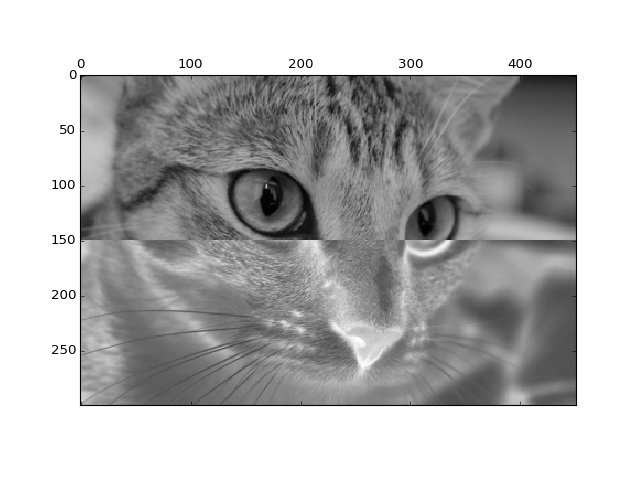

(<matplotlib.figure.Figure at 0x7f662f1ce630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f662efa8390>)

In [142]:
# correction.. partie..
print(np.shape(image_nb))
mask = np.zeros(np.shape(image_nb), dtype=np.bool)
mask[150:, :] = 1
image_nb[mask] = np.abs(1 - image_nb[mask])
display_image_nb(image_nb)
#image_nb[mask] = np.abs(1 - image_nb[mask])

## Filtrage de l'image

Filtrer l'image *image_nb* avec les filtres suivant :

- un filtre moyenneur
- un filtre laplacien
- un filtre de Sobel

Les fonctions qui peuvent vous être utiles sont:

    scipy.ndimage.convolve, skimage.filters.sobel

In [ ]:
import numpy as np
%matplotlib inline

image = np.zeros((10, 10))
image[3, 3:5] = 1
image[4, 2:6] = 1
image[5, 2:6] = 1
image[6, 3:7] = 1
image[7, 3:7] = 1
image[8, 5] = 1
selem = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])  # structuring element
image_eroded = skimage.morphology.erosion(image, selem)
display_image_nb(image*2, cmap=plt.gray())

display_image_nb(image_eroded)


fig, ax = display_image_nb(image * 2 - image_eroded, cmap=plt.gray())

In [ ]:
from skimage import data
import pylab

camera = data.camera()
print(type(camera))
pylab.imshow(camera)


## Opérateurs morphologiques

- Effectuer une dilatation et une ouverture morphologiques  à l'aide d'un élément structurant de type disk (3,3)

les fonctions qui peuvent vous être utiles:

       skimage.morphology.disk, skimage.morphology.opening, skimage.morphology.dilate


<IPython.core.display.Javascript object>


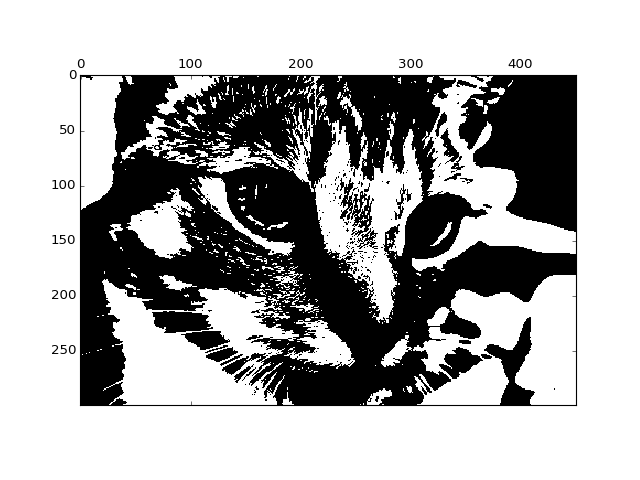

<IPython.core.display.Javascript object>


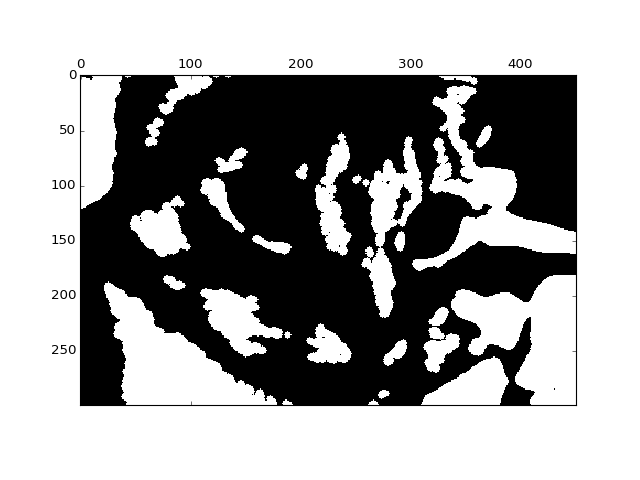

(<matplotlib.figure.Figure at 0x7fa6792a6550>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fa679266828>)

In [20]:
import skimage.color
image = chelsea()
image_nb = skimage.color.rgb2grey(image)
image_binaire = image_nb > 0.5


In [ ]:
# CORRECTION
display_image_nb(image_binaire)
selem = skimage.morphology.disk(3)
display_image_nb(skimage.morphology.opening(image_binaire, selem))

In [ ]:
image = vid.get_data(40)

In [ ]:
vid = imageio.get_reader('/home/seto/Downloads/Vid_A_ball.avi')

image = vid.get_data(40)
red_zone = (image[:,:,0] > 80)  & (image[:,:,1] <  100 ) & (image[:,:,2] < 100)
#image[~red_zone] = [0, 0, 0]
pylab.figure()
#image[mask].shape
ball_edges_default = skimage.segmentation.mark_boundaries(image, red_zone.astype(np.int))

pylab.imshow(ball_edges_default)
pylab.gca().format_coord = format_coord

pylab.show()

In [ ]:
image_lab = skimage.color.rgb2lab(image)
pylab.figure()
pylab.imshow(image_lab[:,:,0])
pylab.figure()
pylab.imshow(image_lab[:,:,1])
pylab.figure()
pylab.imshow(image_lab[:,:,2])

In [ ]:
mask_ball = (image_lab[:,:,2] > 15) & (image_lab[:,:,1] > 20)
pylab.figure()
image_filtered = image.copy()
image_filtered[~mask_ball] = [0,0,0]
pylab.imshow(image_filtered)

In [ ]:
from skimage.segmentation import clear_border
#help(clear_border)
#pylab.figure()
pylab.imshow(image, cmap='gray')
pylab.contour(mask_ball)
pylab.show()

In [ ]:
import skimage.segmentation
pylab.figure()
ball_edges = skimage.segmentation.mark_boundaries(image, mask_ball.astype(np.int))
pylab.imshow(ball_edges)

## improving segmentation / simplifying using morphology operation



In [ ]:
from skimage.morphology import erosion, dilation, opening, closing, white_tophat
from skimage.morphology import black_tophat, skeletonize, convex_hull_image
from skimage.morphology import disk

selem = disk(10)
mask_after_closing = closing(mask_ball, selem)
pylab.figure()
pylab.imshow(mask_after_closing)

In [ ]:
pylab.figure()
ball_edges = skimage.segmentation.mark_boundaries(image, mask_after_closing.astype(np.int))
pylab.imshow(ball_edges)


# extract contours.. and measure area


todo regarder ça http://stackoverflow.com/questions/27910187/how-do-i-calculate-the-measurements-of-a-hand-using-scikit-image

et regarder les trucs de segmentation dans skimage il y a du monde ;D

In [ ]:
from skimage import measure
import matplotlib.patches as mpatches
mask_after_closing.shape

pylab.figure()
label_image = measure.label(mask_after_closing)
#properties = measure.regionprops(label_image)[0]
#properties.bbox
pylab.imshow(image)
for region in measure.regionprops(label_image):

    # skip small images
    if region.area < 100:
        continue

    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    pylab.gca().add_patch(rect)
pylab.show()

#measure.find_contours(mask_after_closing, 0.5)[0])

#for contour in measure.find_contours(mask_after_closing, 0.5):
#    print(measure.regionprops(contour))

In [ ]:
from skimage import measure
import matplotlib.patches as mpatches
mask_after_closing.shape

pylab.figure()
label_image = measure.label(red_zone)
#properties = measure.regionprops(label_image)[0]
#properties.bbox
pylab.imshow(image)
for region in measure.regionprops(label_image):

    # skip small images
    if region.area < 100:
        continue

    # draw rectangle around segmented coins
    minr, minc, maxr, maxc = region.bbox
    rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                              fill=False, edgecolor='red', linewidth=2)
    pylab.gca().add_patch(rect)
pylab.show()

# importing image from url 

# Histogramme


ressources:

 - http://scikit-image.org/docs/dev/auto_examples/plot_windowed_histogram.html
 

<IPython.core.display.Javascript object>


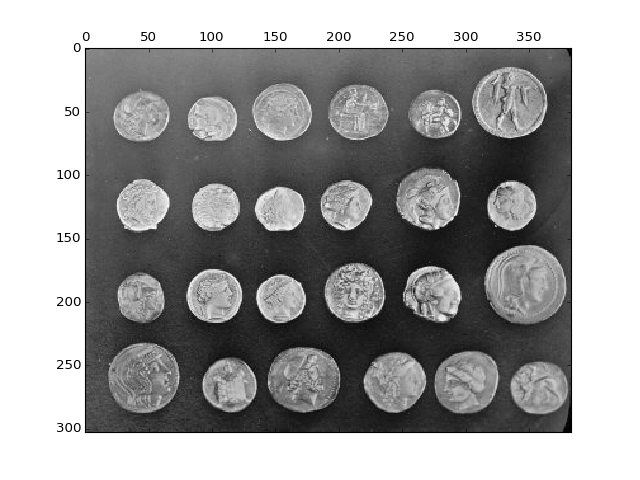

(<matplotlib.figure.Figure at 0x7f663c6b31d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f663c6ac400>)

In [7]:
# Load the `skimage.data.coins` image
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from skimage import data, transform
from skimage.util import img_as_ubyte
from skimage.morphology import disk
from skimage.filters import rank
img = img_as_ubyte(data.coins())
display_image_nb(img)

<IPython.core.display.Javascript object>


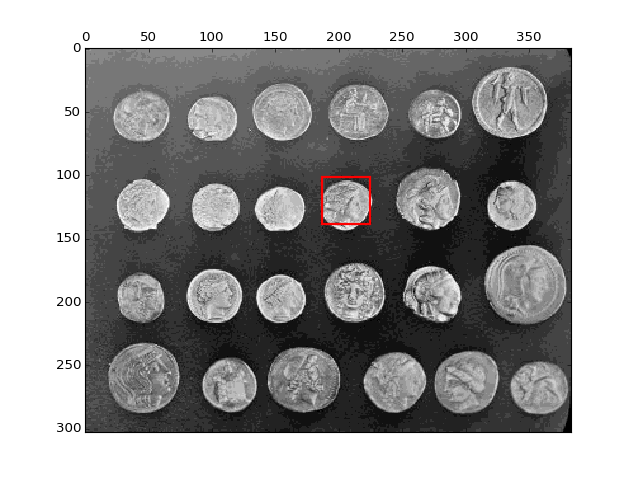

In [8]:
quantized_img = img // 16  # on reduit le nombre de gris 256/16 -> 16 valeurs
y1, x1 = [101, 187]
y2, x2 = [138, 225]  

fig, ax = display_image_nb(quantized_img)
draw_rectangle(y1, x1, y2, x2, ax=ax)



In [ ]:
coin = quantized_img[y1:y2, x1:x2]
display_image_nb(coin)

In [26]:
histogram, bin_edges = np.histogram(coin, bins=16, range=(0,16))
print("Bin edges are {}".format(bin_edges))
#print("Bin edges are {}".format(bin_edges[:-1]))
print(histogram)

normalized_histogram = histogram / float(np.sum(histogram))

plt.figure()
plt.bar(bin_edges[:-1], histogram, width=1)

NameError: name 'coin' is not defined

Question :

Que signifie le 79 dans la liste 
[  0   1  79 180  51   9  23  52 109 173 264 248 155  49  13   0]

    Indice: regarder la documentation de np.histogram

Question :

- Afficher la piece de la première colonne, dernière ligne.
- Calculer l'histogramme correspondant à cette pièce.
- Calculer l'histogramme normalisé correspondant à cette pièce, et l'afficher à l'aide d'un graphique.


## Exemple de fenêtrage..



/home/seto/anaconda3/lib/python3.4/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


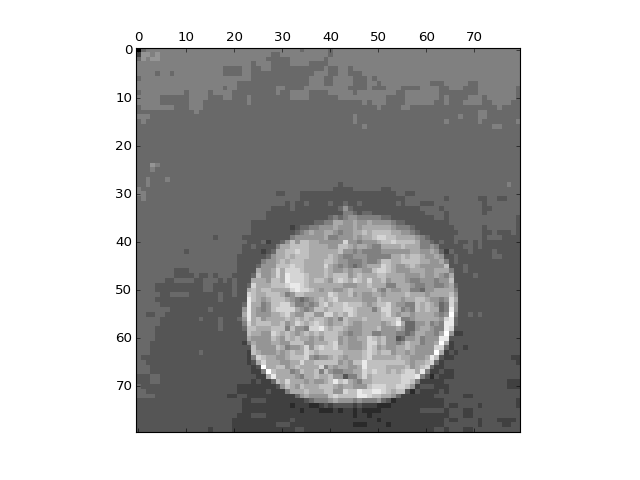

<IPython.core.display.Javascript object>


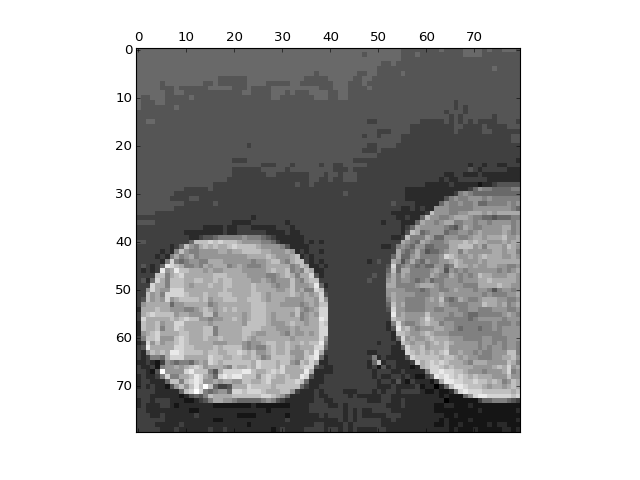

<IPython.core.display.Javascript object>


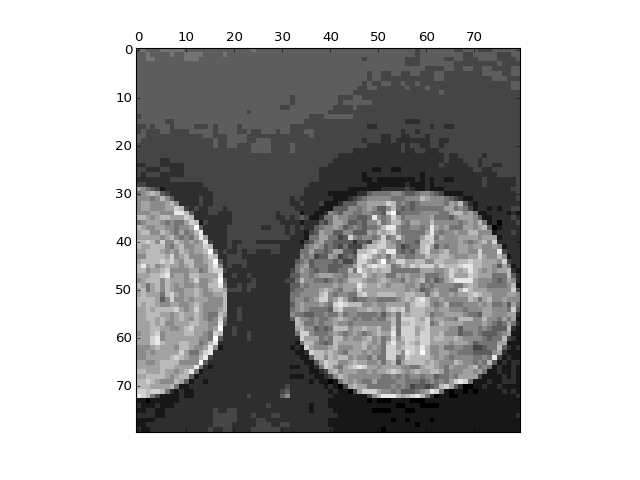

<IPython.core.display.Javascript object>


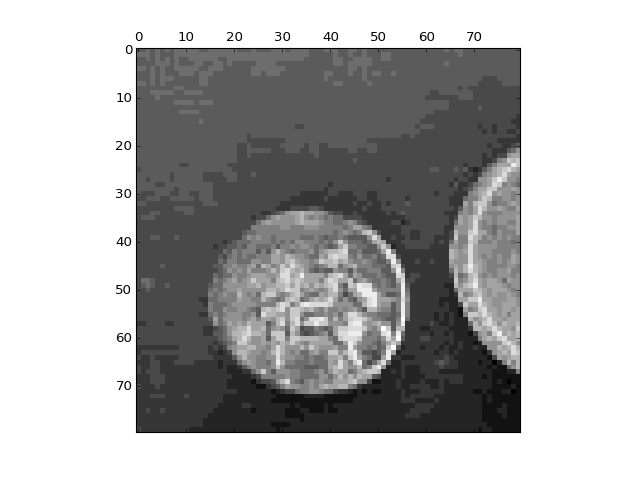

<IPython.core.display.Javascript object>


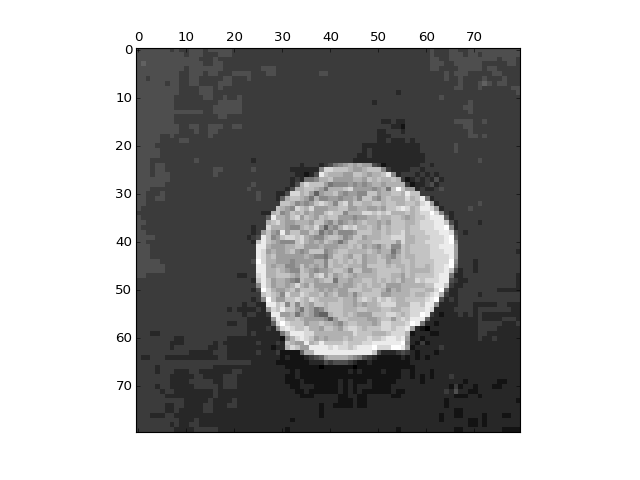

<IPython.core.display.Javascript object>


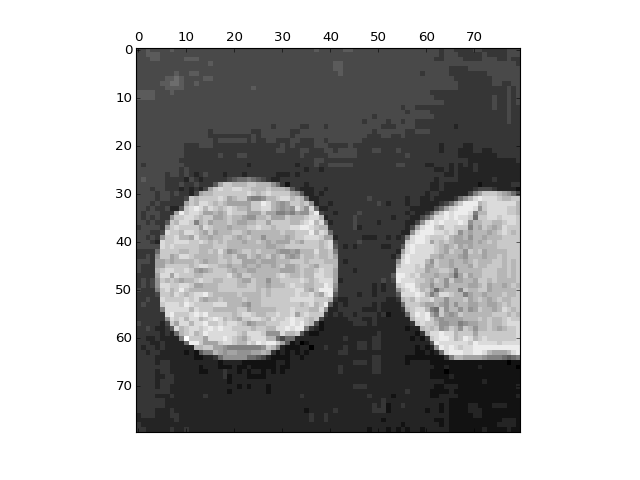

<IPython.core.display.Javascript object>


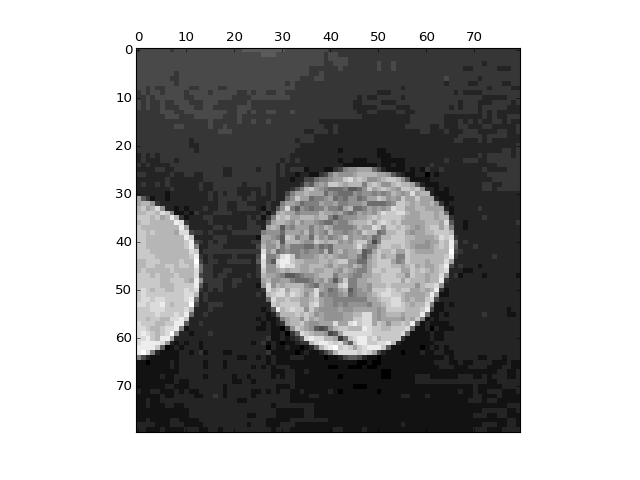

<IPython.core.display.Javascript object>


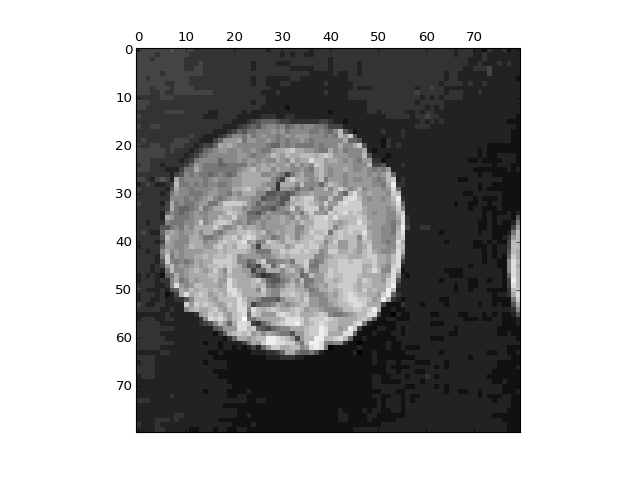

<IPython.core.display.Javascript object>


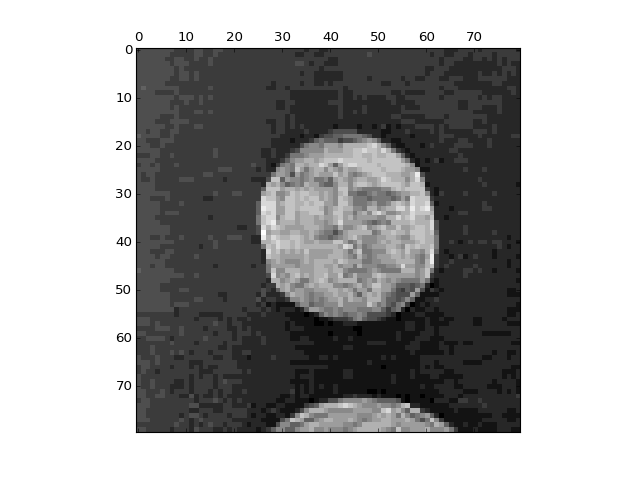

<IPython.core.display.Javascript object>


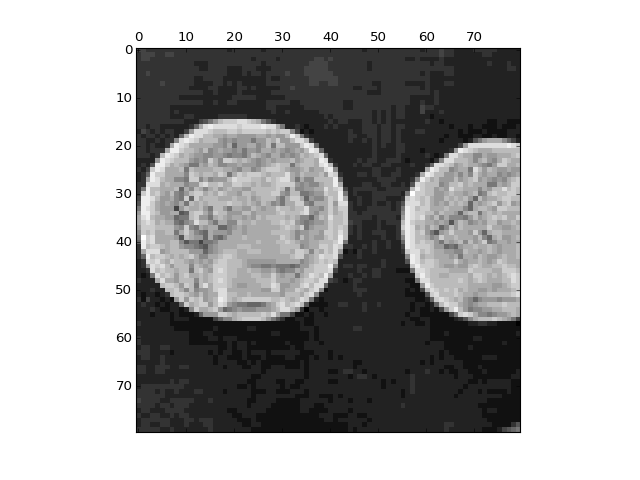

<IPython.core.display.Javascript object>


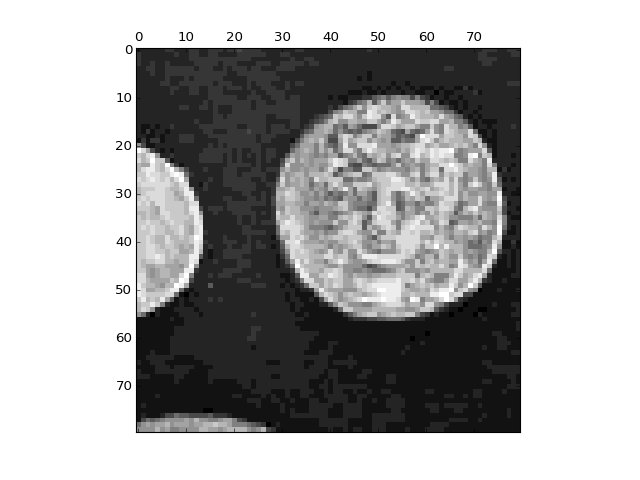

<IPython.core.display.Javascript object>


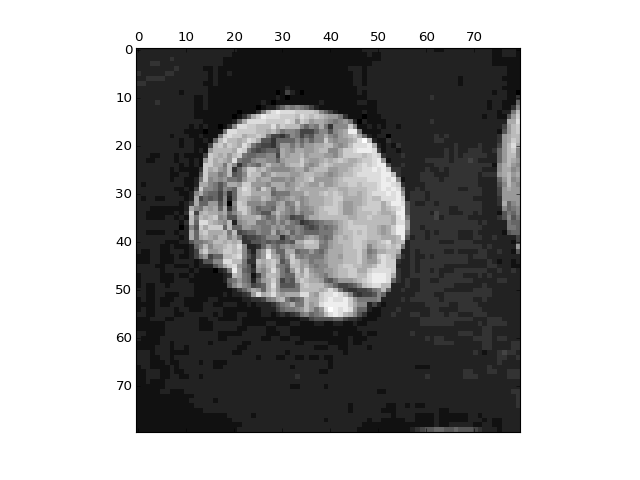

In [46]:
window_length, window_height = 10, 20

from skimage.util.shape import view_as_blocks, view_as_windows
B = view_as_windows(quantized_img, window_shape=(80, 80), step=80)

for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        #histogram, bin_edges = np.histogram(B[i,j], bins=16, range=(0,16))
        fig, ax = display_image_nb(B[i, j])
        #fig.add_subplot(1,2,1)
        #plt.bar(bin_edges[:-1], histogram, width=1)


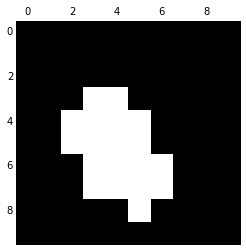

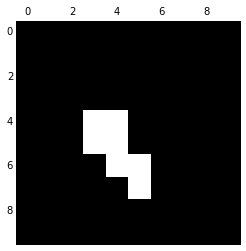

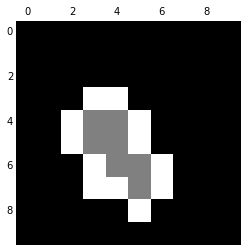

In [98]:
import numpy as np
%matplotlib inline

image = np.zeros((10, 10))
image[3, 3:5] = 1
image[4, 2:6] = 1
image[5, 2:6] = 1
image[6, 3:7] = 1
image[7, 3:7] = 1
image[8, 5] = 1
selem = np.array([[0, 1, 0], [1, 1, 1], [0, 1, 0]])  # structuring element
image_eroded = skimage.morphology.erosion(image, selem)
display_image_nb(image*2, cmap=plt.gray())

display_image_nb(image_eroded)


fig, ax = display_image_nb(image * 2 - image_eroded, cmap=plt.gray())